　　现代投资理论的研究表明,风险的大小在决定组合的表现上具有基础性的作用。风险调整后的收益率就是一个可以同时对收益与风险加以考虑的综合指标,以期能够排除风险因素对绩效评估的不利影响。夏普比率就是一个可以同时对收益与风险加以综合考虑的三大经典指标之一。

　　投资中有一个常规的特点，即投资标的的预期报酬越高，投资人所能忍受的波动风险越高；反之，预期报酬越低，波动风险也越低。所以理性的投资人选择投资标的与投资组合的主要目的为：在固定所能承受的风险下，追求最大的报酬；或在固定的预期报酬下，追求最低的风险。

　　夏普比率计算公式：＝[E(Rp)－Rf]/σp

　　其中E(Rp)：投资组合预期报酬率

　　Rf：无风险利率

　　σp：投资组合的标准差

　　目的是计算投资组合每承受一单位总风险，会产生多少的超额报酬。比率依据资本市场线(Capital Market Line,CML)的观念而来，是市场上最常见的衡量比率。当投资组合内的资产皆为风险性资产时，适用夏普比率。夏普指数代表投资人每多承担一分风险，可以拿到几分报酬；若为正值，代表基金报酬率高过波动风险；若为负值，代表基金操作风险大过于报酬率。这样一来，**每个投资组合都可以计算Sharpe Ratio,即投资回报与多冒风险的比例，这个比例越高，投资组合越佳。**

　　举例而言，假如国债的回报是3%，而您的投资组合预期回报是15%，您的投资组合的标准偏差是6%，那么用15%－3%,可以得出12%（代表您超出无风险投资的回报），再用12%÷6%＝2，代表投资者风险每增长1%，换来的是2%的多余收益。
  
> 日收益 减去 日化无风险收益率 的均值 / 日收益 减去 日化无风险收益率 的标准差
> 
> S = mean(daily_rets - daily_rf) / std(daily_rets - daily_rf)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import quantaxis_ext
from QUANTAXIS import QA_fetch_stock_day_adv
from QUANTAXIS import QA_fetch_index_day_adv
import ploter
import talib
import numpy as np
import settings
import units
import header

QUANTAXIS>> Expand macros in c:\program files\python37\lib\site-packages\macropy\core\hquotes.py
QUANTAXIS>> Finding macros in 'macropy.core.hquotes'
QUANTAXIS>> Importing macros from 'macropy.core.quotes' into 'macropy.core.hquotes'
QUANTAXIS>> Expand macros in c:\program files\python37\lib\site-packages\macropy\core\quotes.py
QUANTAXIS>> Finding macros in 'macropy.core.quotes'
QUANTAXIS>> Expand macros in c:\program files\python37\lib\site-packages\macropy\core\failure.py
QUANTAXIS>> Finding macros in 'macropy.core.failure'
QUANTAXIS>> Importing macros from 'macropy.core.hquotes' into 'macropy.core.failure'
QUANTAXIS>> Expand macros in c:\program files\python37\lib\site-packages\scipy\__config__.py
QUANTAXIS>> Finding macros in 'scipy.__config__'


In [2]:
#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,5]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
s='2018-01-01'
e='2018-12-31'
code=['000002','601398']
zs_code='000300'

## 1. 合并读取 000002,601398 在 2018-01-01~2018-12-31 间的收盘价数据

In [4]:
stock_data=pd.DataFrame()
for c in code:
    if stock_data.empty:
        stock_data=quantaxis_ext.fetch_stock_day_adv(c,s,e)[['close']].rename(columns={'close':c})
    else:
        stock_data=stock_data.join(quantaxis_ext.fetch_stock_day_adv(c,s,e)[['close']].rename(columns={'close':c}))

In [5]:
stock_data.head()

,000002,601398
date,,
2018-01-02,32.56,6.18
2018-01-03,32.33,6.16
2018-01-04,33.12,6.07
2018-01-05,34.76,6.08
2018-01-08,35.99,6.07


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2018-01-02 to 2018-12-28
Data columns (total 2 columns):
000002    243 non-null float64
601398    243 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


## 2. 读取 沪深300指数（000300） 在 2018-01-01~2018-12-31 间的收盘价数据

In [7]:
benchmark_data=quantaxis_ext.fetch_index_day_adv(zs_code,s,e)[['close']].rename(columns={'close':zs_code})

In [8]:
benchmark_data.head()

,000300
date,
2018-01-02,4087.40
2018-01-03,4111.39
2018-01-04,4128.81
2018-01-05,4138.75
2018-01-08,4160.16


In [9]:
benchmark_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2018-01-02 to 2018-12-28
Data columns (total 1 columns):
000300    243 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB


## 3. 图像和汇总显示 000002,601398 的日收盘价

,000002,601398
count,243.000000,243.000000
mean,27.440082,5.832263
std,4.921803,0.588638
min,20.590000,5.080000
25%,23.715000,5.390000
50%,25.730000,5.630000
75%,31.300000,6.070000
max,41.130000,7.750000


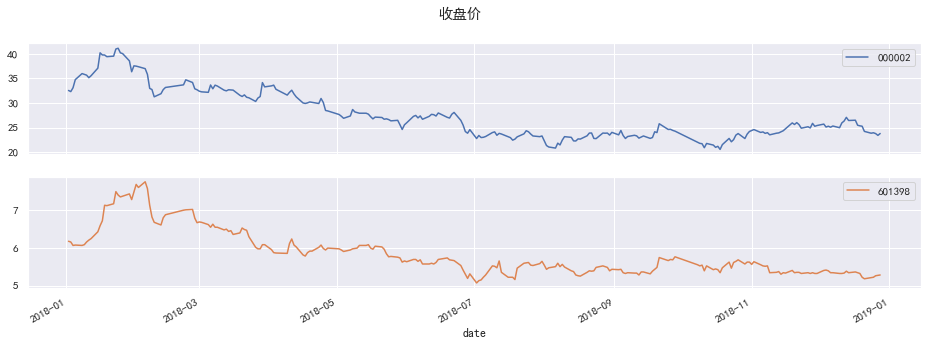

In [10]:
stock_data.plot(subplots=True,title='收盘价')

stock_data.describe()

## 4. 图像和汇总显示 沪深300指数 的日收盘价

,000300
count,243.000000
mean,3605.809547
std,380.884173
min,2990.510000
25%,3265.065000
50%,3517.660000
75%,3898.570000
max,4389.890000


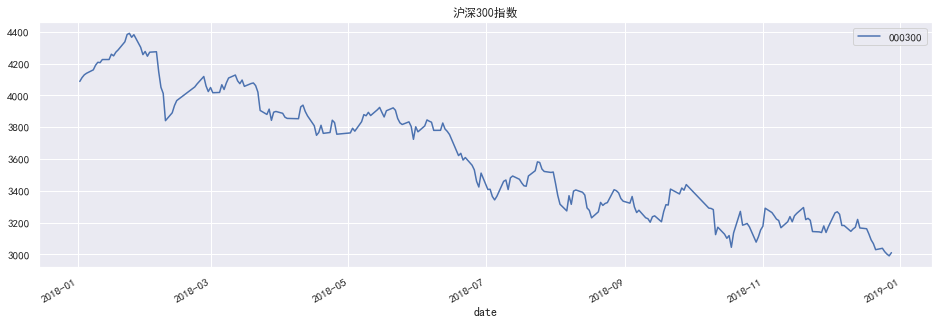

In [11]:
benchmark_data.plot(title='沪深300指数')

benchmark_data.describe()

## 5. 计算日收益

,000002,601398
count,242.000000,242.000000
mean,-0.000933,-0.000506
std,0.026822,0.016535
min,-0.092593,-0.058124
25%,-0.016926,-0.009252
50%,-0.003176,0.000000
75%,0.014477,0.007336
max,0.090329,0.061012


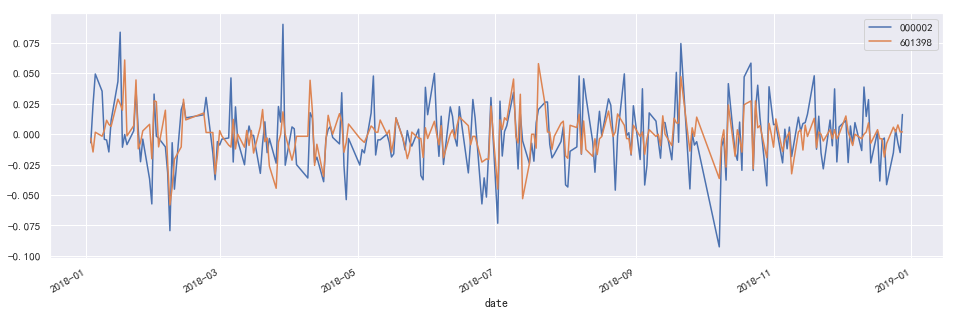

In [12]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change(1)

# plot the daily returns
# ... YOUR CODE FOR TASK 5 HERE ...
stock_returns.plot()

# summarize the daily returns
# ... YOUR CODE FOR TASK 5 HERE ...
stock_returns.describe()

## 6. 沪深300日收益

,000300
count,242.000000
mean,-0.001172
std,0.013489
min,-0.047992
25%,-0.008620
50%,-0.001189
75%,0.006632
max,0.043165


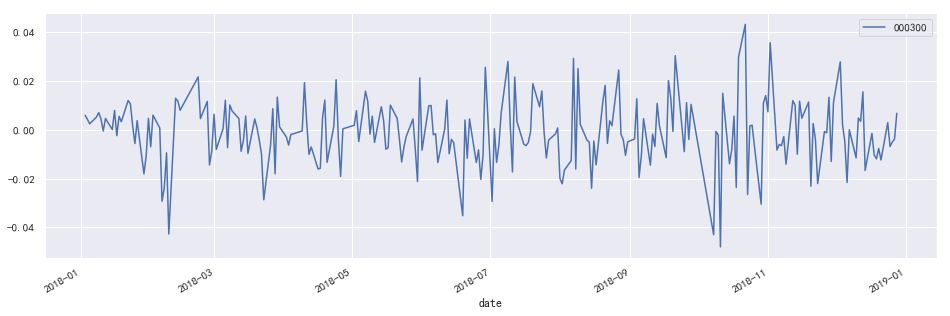

In [13]:
benchmark_returns = benchmark_data.pct_change(1)

benchmark_returns.plot()

benchmark_returns.describe()

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

stock_returns.head()
benchmark_returns.head()

,000300
date,
2018-01-02,NaN
2018-01-03,0.005869
2018-01-04,0.004237
2018-01-05,0.002407
2018-01-08,0.005173


## 7. 计算 000002,601398 与 沪深300 之间的日回报率差额

,000002,601398
count,242.000000,242.000000
mean,0.000239,0.000666
std,0.019728,0.013380
min,-0.055571,-0.056344
25%,-0.011246,-0.006867
50%,-0.001366,0.000044
75%,0.011201,0.008530
max,0.076971,0.055527


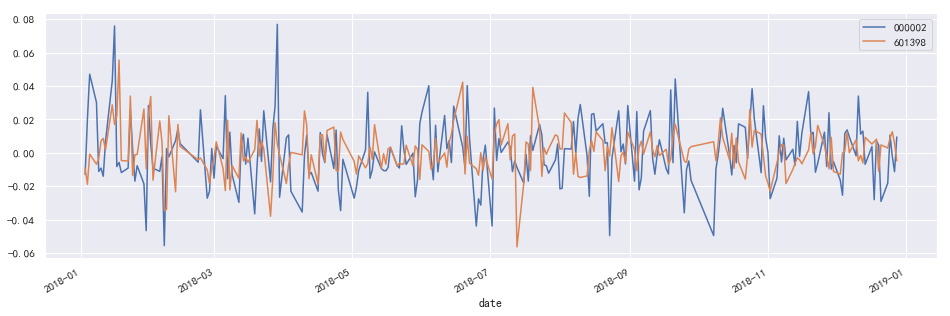

In [15]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(benchmark_returns[zs_code],axis='index')

# summarize the excess_returns
# ... YOUR CODE FOR TASK 7 HERE ...
excess_returns.describe()

# plot the excess_returns
# ... YOUR CODE FOR TASK 7 HERE ...
excess_returns.plot()

## 8. 步骤1：单支股票的日收益平均差与指数日收益平均差的对比

现在我们终于可以开始计算夏普比率了。 首先，我们需要计算excess_returns的平均值。 这告诉我们与基准相比，每天的投资收益率或多或少。

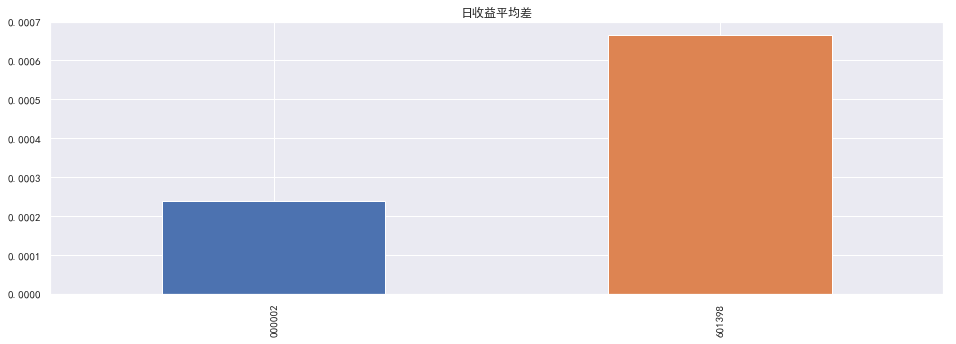

In [16]:
# calculate the mean of excess_returns 
# ... YOUR CODE FOR TASK 8 HERE ...
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='日收益平均差')

## 8. 步骤2：日收益标准差的对比

看起来 `万科A` 和 `工商银行` 的平均每日回报之间存在相当大的差异。

接下来，我们计算excess_returns的标准偏差。 这向我们展示了与 沪深300 指数投资相比，股票投资所带来的风险。

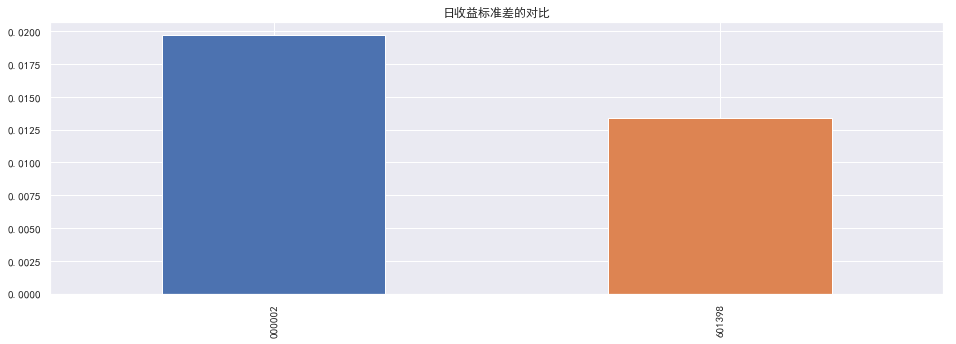

In [17]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
# ... YOUR CODE FOR TASK 9 HERE ...
sd_excess_return.plot.bar(title='日收益标准差的对比')

## 10. 合并计算

现在我们只需要计算avg_excess_returns和sd_excess_returns的比率。 结果现在最终是夏普比率，并表明在考虑单位风险收益率的情况下，还有多少（或更少）回报投资机会。

夏普比率通常通过将其乘以周期数的平方根来进行年化。 我们使用每日数据作为输入，因此我们将使用交易日数（5天，52周，减去几个假期）的平方根。

*以下运行时使用了指数的交易数量为交易日数来处理。`benchmark_data.shape[0]`*

4.101864890600734

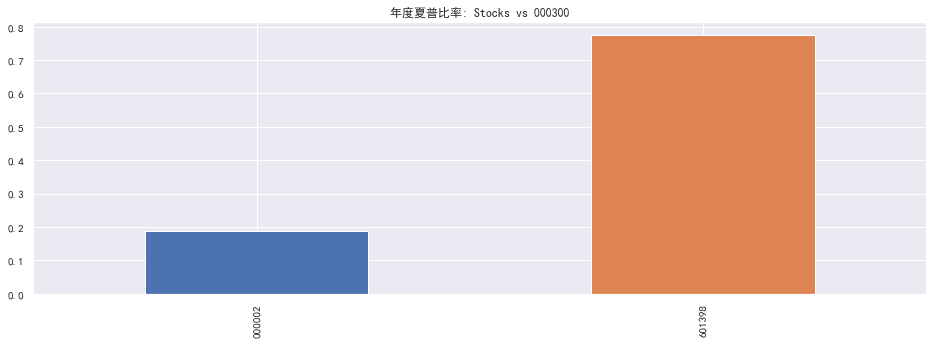

In [18]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(benchmark_data.shape[0])
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

annual_sharpe_ratio.max()/annual_sharpe_ratio.min()

# plot the annualized sharpe ratio
# ... YOUR CODE FOR TASK 10 HERE ...
annual_sharpe_ratio.plot.bar(title='年度夏普比率: Stocks vs 000300')

## 11.结论

鉴于两个夏普比率，我们应该投资哪些投资？ 2016年，`工商银行` 的夏普比率是 `万科A` 的四倍。 这意味着，对于投资者假设的每个风险单位，`工商银行`的投资回报率是 `沪深300指数` 的 的四倍。 换句话说，在风险调整后的条款中，对`工商银行`的投资会更具吸引力。

这种差异主要是由于 `工商银行` 和 `万科A` 之间的回报而非风险的差异。 选择 `工商银行` 而不是 `万科A` （以标准差衡量）的风险仅稍高，因此 `工商银行` 的夏普比率上升最终主要是因为 `工商银行` 的平均日收益率较高。

当面对提供不同回报和风险的投资选择时，夏普比率有助于通过风险差异调整回报来做出决策，并允许投资者在平等条件下比较投资机会。

从下面的数据中也可以看出来。2018年沪深300指数下跌了26.34%。万科A下跌了26.84%，而工商银行只下跌了14.40%。相对来说表现更好。

In [19]:
((stock_data.iloc[-1]-stock_data.iloc[0])/stock_data.iloc[0])

((benchmark_data.iloc[-1]-benchmark_data.iloc[0])/benchmark_data.iloc[0])

000002   -0.268428
601398   -0.144013
dtype: float64

000300   -0.263432
dtype: float64